In [93]:
import tweepy
import json
from twitter__api import (api_key, api_secret, access_token, access_token_secret)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [94]:
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
print(target_users)

('@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes')


In [95]:
# target_user = input('Please choose one news platform from above list for sentiments analysis ')

In [96]:
# print(target_user)

In [97]:
# Target Account

target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # print(json.dumps(tweet, indent = 4 , sort_keys = True))
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"],
                           'Text': tweet['text'], 
                           'Source': tweet['source'],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [98]:
len(sentiments)

100

In [99]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.7804,Mon Nov 27 20:02:27 +0000 2017,0.713,0.000,0.287,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Make all your streams come true with a 1-month...,1
1,0.4019,Mon Nov 27 18:32:06 +0000 2017,0.803,0.000,0.197,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Singer-songwriter @JoshGroban will headline th...,2
2,0.1867,Mon Nov 27 12:01:03 +0000 2017,0.916,0.000,0.084,"<a href=""https://studio.twitter.com"" rel=""nofo...","Tomorrow, don't miss @Harry_Styles perform alo...",3
3,-0.2263,Mon Nov 27 00:53:16 +0000 2017,0.909,0.091,0.000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Due to #NFL football overrun #CBS is delayed i...,4
4,0.4559,Mon Nov 27 00:16:34 +0000 2017,0.858,0.000,0.142,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @RecordingAcad: Two days left 'til #GRAMMYs...,5


In [100]:
sentiments_pd.to_csv('SentimentAnalysisCNN.csv')

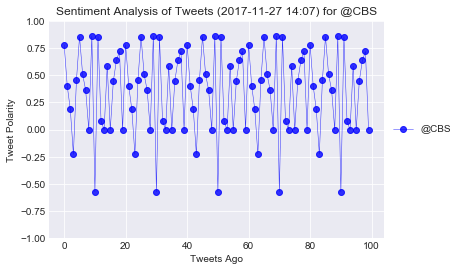

In [101]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, color = 'b', label = '@CNN')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1, 1)
art = []
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SentimentAnalysisOfTweetsOfCBS", additional_artists=art, bbox_inches="tight")
plt.show()